# Lab Segmentation 1

In [169]:
from commonfunctions import *
import skimage.io as io
import numpy as np
import skimage as ski

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


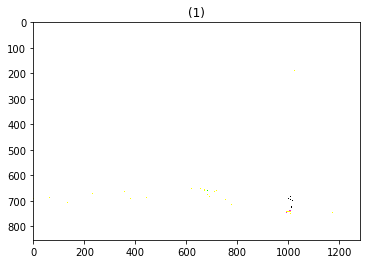

(853, 1280, 3)
(853, 1280)


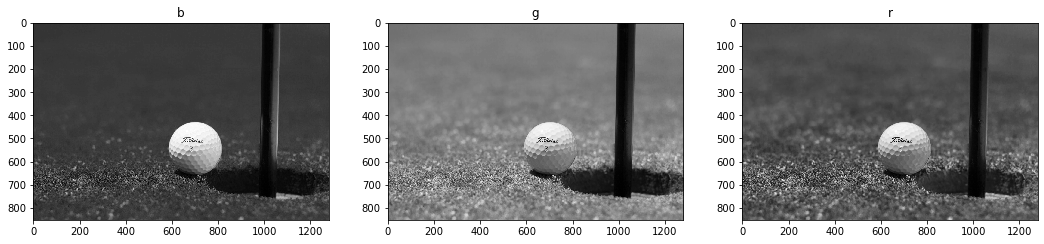

The Green channel is dominating as the G channel picture is the brighter one
[[110. 110. 111. ... 132. 132. 132.]
 [110. 110. 111. ... 132. 132. 132.]
 [111. 110. 111. ... 132. 132. 132.]
 ...
 [120. 119. 119. ... 139. 140. 145.]
 [121. 119. 118. ... 136. 137. 141.]
 [121. 119. 118. ... 134. 132. 136.]]


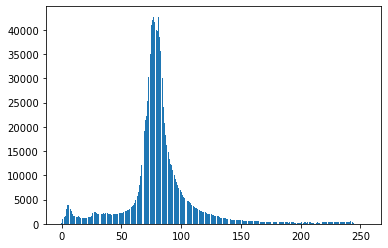

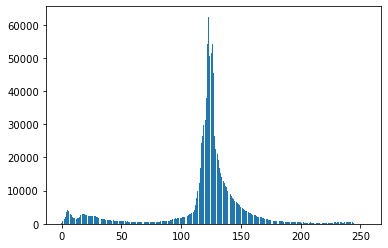

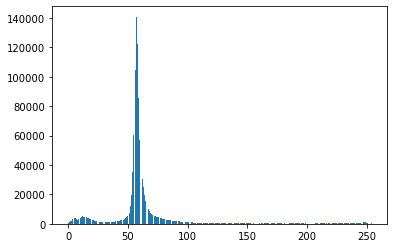

In [170]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
golf_img=io.imread("imgs/exp1/golf.jpeg").astype(float)
golf_img=np.array(golf_img)
show_images([golf_img])
# print(golf_img)
# print("kak")
# golf_img=golf_img*1.2
# print(golf_img)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
print(golf_img.shape)
[r, g, b] = golf_img[:, :, 0], golf_img[:, :, 1], golf_img[:, :, 2]
print(r.shape)
show_images([b,g,r],["b","g","r"])

# plt.axis("off")
# plt.imshow(r,cmap="Reds")
# plt.show()
# plt.imshow(g,cmap="Greens")
# plt.show()
# plt.imshow(b,cmap="Blues")
# plt.show()
# ''' 
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
# '''
# #
print("The Green channel is dominating as the G channel picture is the brighter one")

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
print(g)
showHist(r)
showHist(g)
showHist(b)


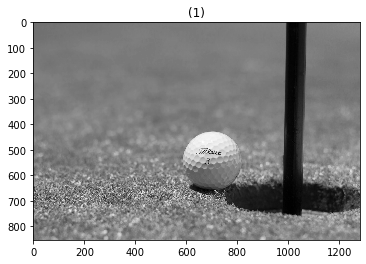

[[110. 110. 111. ... 132. 132. 132.]
 [110. 110. 111. ... 132. 132. 132.]
 [111. 110. 111. ... 132. 132. 132.]
 ...
 [120. 119. 119. ... 139. 140. 145.]
 [121. 119. 118. ... 136. 137. 141.]
 [121. 119. 118. ... 134. 132. 136.]]


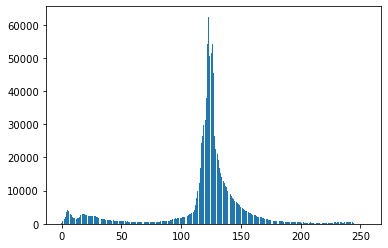

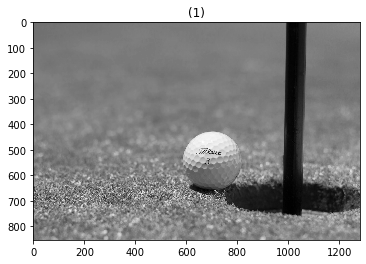

In [171]:

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image
# golf_img[golf_img<100]=1

g_temp=np.copy(g)
show_images([g_temp])
#g_temp=ski.filters.median(g_temp)
#g_temp=ski.filters.gaussian(g_temp,sigma=0.8)
print(g_temp)
#g_temp=g_temp*255
showHist(g_temp)
show_images([g_temp])


(853, 1280)
kak


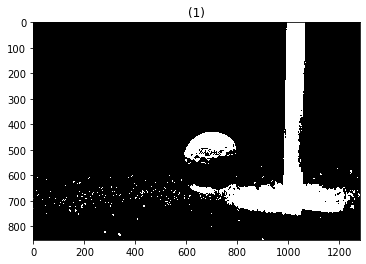

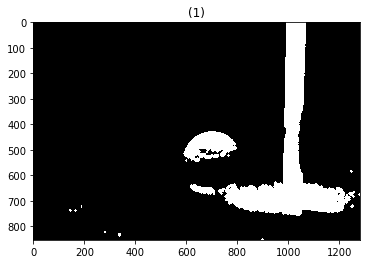

In [172]:
g_temp_here=g_temp
print(g_temp_here.shape)
rows,columns =g_temp_here.shape
g_temp_here=np.where( np.logical_or(g_temp_here>200 , g_temp_here<50) ,1,0)

print("kak")
show_images([g_temp_here])
g_temp_here=ski.morphology.binary_erosion(g_temp_here)
g_temp_here=ski.morphology.binary_erosion(g_temp_here)
g_temp_here=ski.morphology.binary_erosion(g_temp_here)
g_temp_here=ski.morphology.binary_dilation(g_temp_here)
g_temp_here=ski.morphology.binary_dilation(g_temp_here)
g_temp_here=ski.morphology.binary_dilation(g_temp_here)
g_temp_here=ski.morphology.binary_dilation(g_temp_here)
g_temp_here=ski.morphology.binary_dilation(g_temp_here)
show_images([g_temp_here])
#print(g_temp_here)


[[0.43137255 0.43137255 0.43529412 ... 0.51764706 0.51764706 0.51764706]
 [0.43137255 0.43137255 0.43529412 ... 0.51764706 0.51764706 0.51764706]
 [0.43529412 0.43137255 0.43529412 ... 0.51764706 0.51764706 0.51764706]
 ...
 [0.47058824 0.46666667 0.46666667 ... 0.54509804 0.54901961 0.56862745]
 [0.4745098  0.46666667 0.4627451  ... 0.53333333 0.5372549  0.55294118]
 [0.4745098  0.46666667 0.4627451  ... 0.5254902  0.51764706 0.53333333]]


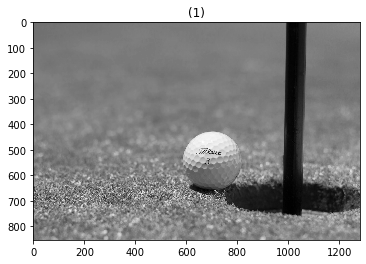

[[0.24117647 0.24117647 0.23921569 ... 0.30980392 0.30980392 0.30980392]
 [0.24117647 0.24117647 0.23921569 ... 0.30980392 0.30980392 0.30980392]
 [0.24509804 0.24117647 0.23921569 ... 0.30980392 0.30980392 0.30980392]
 ...
 [0.26862745 0.25882353 0.25882353 ... 0.33137255 0.33529412 0.35490196]
 [0.27254902 0.25882353 0.25490196 ... 0.31960784 0.32352941 0.33921569]
 [0.27254902 0.25882353 0.25490196 ... 0.30588235 0.30392157 0.31960784]]


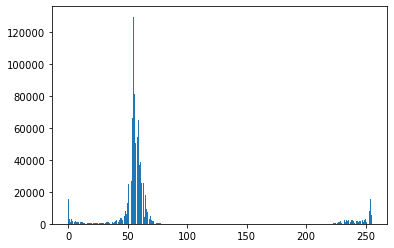

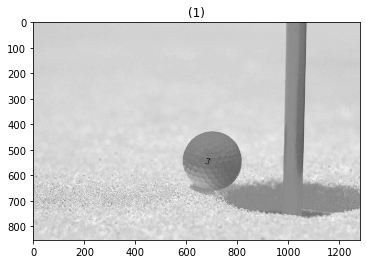

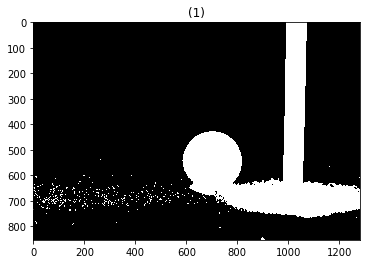

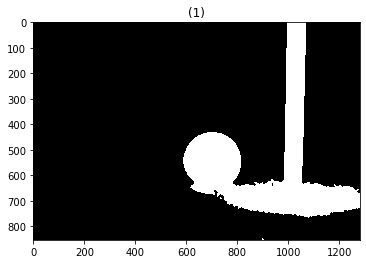

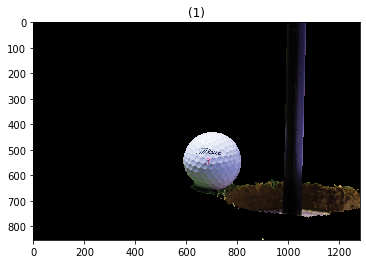

In [173]:

######## another way for part1

g_again=np.copy(g)/255
print(g_again)
show_images([g_again])
#g_again=np.where(g_again>0.75*250,1,0)
rb_mean=(r+b)/2
rb_mean=rb_mean/255
print(rb_mean)
filtered_img=(g_again-rb_mean)
showHist(filtered_img*255)
show_images([filtered_img])
filtered_img=(g_again-rb_mean)>0.15
filtered_img=np.logical_not(filtered_img)
show_images([filtered_img])
filtered_img=ski.morphology.erosion(filtered_img[:,:])
filtered_img=ski.morphology.erosion(filtered_img[:,:])
filtered_img=ski.morphology.erosion(filtered_img[:,:])
filtered_img=ski.morphology.erosion(filtered_img[:,:])
filtered_img=ski.morphology.erosion(filtered_img[:,:])
filtered_img=ski.morphology.dilation(filtered_img)
filtered_img=ski.morphology.dilation(filtered_img)
show_images([filtered_img])

output_golf = golf_img/255 * (np.stack((filtered_img,filtered_img,filtered_img),axis=2))
show_images([output_golf])

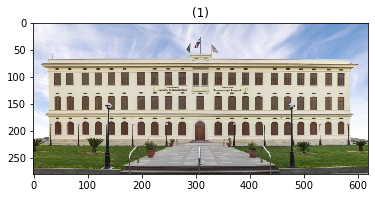

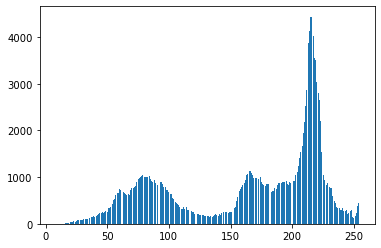

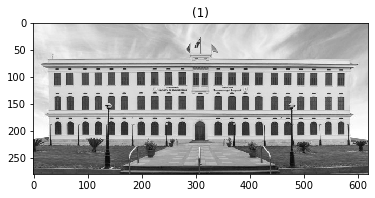

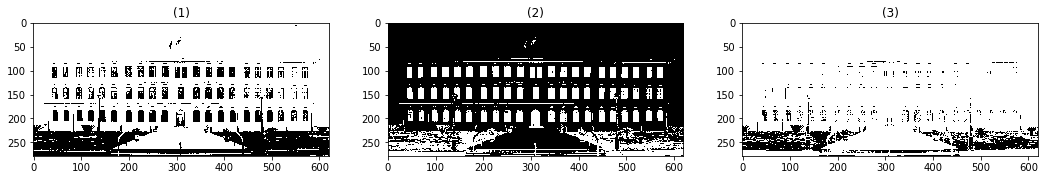

In [174]:
# 1- Get the required RGB color (Using a color picker)

(r_p,g_p,b_p)=(98,114,52)

# 2- Read image
cufe=io.imread("imgs/exp2/cufe.png").astype(float) /255
cufe=np.array(cufe)
show_images([cufe])
# 3- extract R, G and B channels (as float)
[r, g, b] = cufe[:, :, 0], cufe[:, :, 1], cufe[:, :, 2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
r_dif=r-r_p
g_dif=g-g_p
b_dif=b-b_p
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
r_dist=np.abs(r-r_p)
g_dist=np.abs(g-g_p)
b_dist=np.abs(b-b_p)
# 6-  create a mask by thresholding the differences

showHist(g*255)
show_images([g])
cufe[:,:,0]=cufe[:,:,0]>100/255  
cufe[:,:,1]=np.logical_and(cufe[:,:,1]>50/255 ,cufe[:,:,1]<100/255)
cufe[:,:,2]=cufe[:,:,2]>45/255
show_images([cufe[:,:,0],cufe[:,:,1],cufe[:,:,2]])
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it


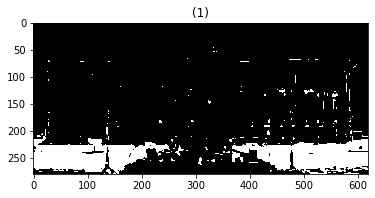

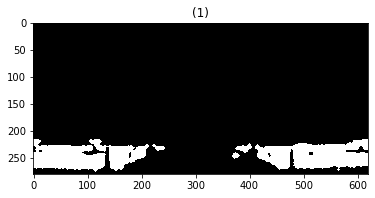

In [175]:
cufe_rgb=io.imread("imgs/exp2/cufe.png").astype(float) /255
cufe_hsv=rgb2hsv(cufe_rgb)
hue=np.logical_and(cufe_hsv[:,:,0]> 40 /255   ,cufe_hsv[:,:,0]<85/255)

show_images([hue])

hue=ski.morphology.erosion(hue[:,:])
hue=ski.morphology.erosion(hue[:,:])
hue=ski.morphology.erosion(hue[:,:])
hue=ski.morphology.erosion(hue[:,:])
hue=ski.morphology.dilation(hue[:,:])
hue=ski.morphology.dilation(hue[:,:])
hue=ski.morphology.dilation(hue[:,:])


show_images([hue])

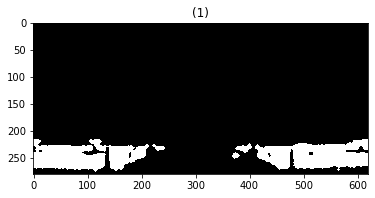

(279, 620, 3)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


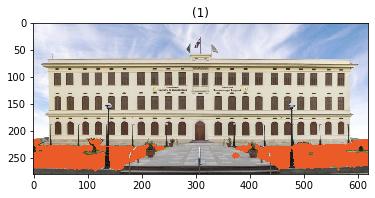

In [176]:
binary_filter=hue
show_images([binary_filter])
print(cufe_rgb.shape)
print(binary_filter)
cufe_rgb[binary_filter]=(230/250,90/250,40/250)
show_images([cufe_rgb])
# binary_r=np.copy(binary_filter)
# binary_r[binary_r==True]=230

# binary_g=np.copy(binary_filter)
# binary_g[binary_g==True]=90

# binary_b=np.copy(binary_filter)
# binary_b[binary_b==True]=40


# binary_filter=np.stack( (binary_r,binary_g,binary_b),axis=2)
# # R = 230 , G = 90 , B=40
# show_images([binary_filter])


# print(binary_filter.shape)